In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dpath = "/content/drive/MyDrive/bitamin_project/output/"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 프레임 불러오기
df_맑은날 = pd.read_csv(dpath+'sunny/맑은날.csv')
df_여행 = pd.read_csv(dpath+'sunny/여행.csv')
df_화창한날 = pd.read_csv(dpath+'sunny/화창한날.csv')

df_미세먼지 = pd.read_csv(dpath+'foggy/미세먼지.csv')
df_안개 = pd.read_csv(dpath+'/foggy/안개.csv')
df_흐린날 = pd.read_csv(dpath+'foggy/흐린날.csv')

df_눈오는날 = pd.read_csv(dpath+'snowy/눈오는날.csv')
df_크리스마스 = pd.read_csv(dpath+'snowy/크리스마스.csv')

df_비오는날 = pd.read_csv(dpath+'rainy/비오는날.csv')
df_여름비 = pd.read_csv(dpath+'rainy/여름비.csv')
df_장마 = pd.read_csv(dpath+'rainy/장마.csv')

df_일몰 = pd.read_csv(dpath+'sunrise_sunset/일몰.csv')
df_일출 = pd.read_csv(dpath+'sunrise_sunset/일출.csv')
df_저녁노을 = pd.read_csv(dpath+'sunrise_sunset/저녁노을.csv')
df_노을 = pd.read_csv(dpath+'sunrise_sunset/노을.csv')

In [ ]:
df_sunny = pd.concat([df_맑은날, df_여행, df_화창한날], ignore_index=True)
df_foggy = pd.concat([df_미세먼지, df_안개, df_흐린날], ignore_index=True)
df_snowy = pd.concat([df_눈오는날, df_크리스마스], ignore_index=True)
df_rainy = pd.concat([df_비오는날, df_여름비, df_장마], ignore_index=True)
df_sunrise_sunset = pd.concat([df_일몰, df_일출, df_저녁노을, df_노을], ignore_index=True)

In [ ]:
print(len(df_sunny), len(df_foggy), len(df_snowy), len(df_rainy), len(df_sunrise_sunset))

7475 6384 6892 7599 5456


In [ ]:
df_sunny['label'] = ['sunny']*len(df_sunny)
df_foggy['label'] = ['foggy']*len(df_foggy)
df_snowy['label'] = ['snowy']*len(df_snowy)
df_rainy['label'] = ['rainy']*len(df_rainy)
df_sunrise_sunset['label'] = ['sunrise_sunset']*len(df_sunrise_sunset)

In [ ]:
playlist = pd.concat([df_sunny, df_foggy, df_snowy, df_rainy, df_sunrise_sunset], ignore_index=True)
playlist.rename(columns={'artitst': 'artist'}, inplace=True)
playlist

,title,artist,likes,tag,specific_tag,label
0,pony,잔나비,14090,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny
1,한강에서 (Feat. BIG Naughty),폴킴,25744,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny
2,나의 바람 (Wind And Wish),비투비,52023,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny
3,D N D,Apink (에이핑크),14529,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny
4,on the street (with J. Cole),"j-hope, J. Cole",56397,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny
...,...,...,...,...,...,...
33801,Rainy Days (Feat. Bindi X),Debauch,14,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset
33802,Place In Heaven (Live),Jasmine Kelly,11,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset
33803,you're the only one,keepitinside,109,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset
33804,Easy,Mac Ayres,29622,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset


Label distribution:
rainy             7599
sunny             7475
snowy             6892
foggy             6384
sunrise_sunset    5456
Name: label, dtype: int64


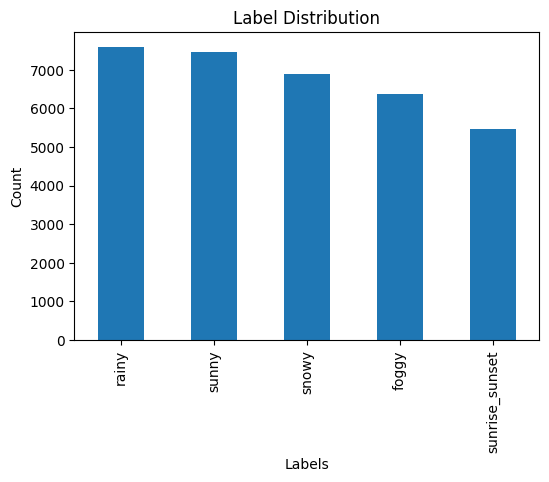

In [ ]:
# Summary statistics of the 'label' column
label_counts = playlist['label'].value_counts()
print("Label distribution:")
print(label_counts)

# Plot a bar chart for label distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

In [ ]:
# Count of unique artists for each label
artist_per_label = playlist.groupby('label')['artist'].nunique()
print("Unique artists per label:")
print(artist_per_label)

Unique artists per label:
label
foggy             2921
rainy             2525
snowy             2243
sunny             2831
sunrise_sunset    2841
Name: artist, dtype: int64


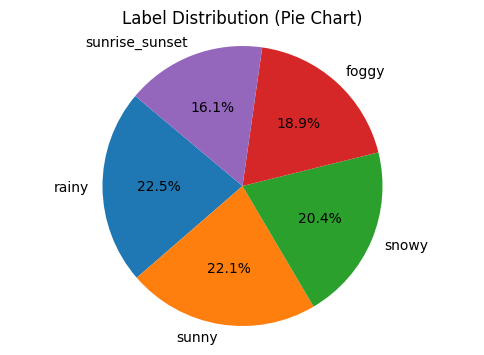

In [ ]:
# Plotting a pie chart for label distribution
plt.figure(figsize=(6, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title("Label Distribution (Pie Chart)")
plt.show()

In [ ]:
playlist.head()

,title,artist,likes,tag,specific_tag,label
0,pony,잔나비,14090,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny
1,한강에서 (Feat. BIG Naughty),폴킴,25744,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny
2,나의 바람 (Wind And Wish),비투비,52023,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny
3,D N D,Apink (에이핑크),14529,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny
4,on the street (with J. Cole),"j-hope, J. Cole",56397,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny


In [ ]:
playlist.sort_values(by='likes', ascending=False)

,title,artist,likes,tag,specific_tag,label
20723,봄날,방탄소년단,549567,크리스마스,"['겨울', '아이돌', '추운날씨', '크리스마스', '발라드', '잔잔한', '...",snowy
9931,봄날,방탄소년단,549566,미세먼지,"['미세먼지', '아이돌', '오후', '기분업', '걸그룹', '남자이돌', '여...",foggy
9436,봄날,방탄소년단,549564,미세먼지,"['봄노래', '봄', '미세먼지', '봄바람에날려봄']",foggy
8438,봄날,방탄소년단,549564,미세먼지,"['헬스장', '즐거운', '외출', '미세먼지', '상쾌한', '댄스', '기분전...",foggy
8230,봄날,방탄소년단,549564,미세먼지,"['꽃', '산책', '산뜻한', '봄', '띵_곡', '미세먼지', '피크닉', ...",foggy
...,...,...,...,...,...,...
128,Once I Loved,"Till Brönner, Aimee Mann",0,맑은날,"['휴식', '기분전환', '재즈', '일', '공부', '오후', '아침', '맑...",sunny
126,I Only Want To Be With You (Album Version),Curtis Stigers,0,맑은날,"['휴식', '기분전환', '재즈', '일', '공부', '오후', '아침', '맑...",sunny
120,Dansez sur moi,Maurane,0,맑은날,"['휴식', '기분전환', '재즈', '일', '공부', '오후', '아침', '맑...",sunny
14905,The Christmas Song,Liz Story,0,눈오는날,"['크리스마스', '뉴에이지', '눈오는날', '추위', '행복', '아침', '주...",snowy


In [ ]:
playlist.groupby('label')

In [ ]:
duplicate_rows = playlist[playlist.duplicated(subset=['title'])]
duplicate_rows.sort_values('title')

,title,artist,likes,tag,specific_tag,label
9240,! (느낌표),오늘 (Today),906,미세먼지,"['미세먼지', '먼지', '저리가', '날려버려', '날씨', '신나는']",foggy
32469,'Round Midnight,Miles Davis,523,노을,"['Jazz', '노을', '재즈', '음악', 'Music', 'Bill', 'K...",sunrise_sunset
13755,'S Wonderful,Moon (혜원),126,흐린날,"['흐린날', '휴식', '밤', '재즈', '매장', '힐링', '이별', '무드...",foggy
285,'S Wonderful,"Tony Bennett, Diana Krall",553,맑은날,"['데이트', '행복', '사랑', '연인', '맑은날', '달콤', '재즈', '...",sunny
168,'S Wonderful,Diana Krall,85,맑은날,"['화사한', '휴식', '재즈', '일상', '밝은날', '맑은날', '화려한',...",sunny
...,...,...,...,...,...,...
14822,흰눈,이루,45012,눈오는날,"['감성', '겨울', '차가움', '이별', '슬픔', 'Winter', '눈',...",snowy
20201,흰눈 사이로 하이힐 타고,"오렌지 캬라멜, 뉴이스트",11839,크리스마스,"['겨울', '캐롤', 'kpop', 'K캐롤', '아이돌', '케이팝', '크리스...",snowy
18711,흰눈 사이로 하이힐 타고,"오렌지 캬라멜, 뉴이스트",11839,크리스마스,"['크리스마스', 'kpop', '설레는', '낭만적', '감성']",snowy
17477,흰눈 사이로 하이힐 타고,"오렌지 캬라멜, 뉴이스트",11839,크리스마스,"['크리스마스', '가요', '첫눈', '크리스마스캐롤', '캐롤', '겨울', '...",snowy


In [ ]:
unique_pl = playlist[['title','artist', 'label']].value_counts().to_frame(name='number')
unique_pl.head()

,,,number
title,artist,label,
비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),rainy,50
비,폴킴,rainy,46
Rain,태연 (TAEYEON),rainy,44
우산 (Feat. 윤하),에픽하이 (EPIK HIGH),rainy,40
All I Want for Christmas Is You,Mariah Carey,snowy,40


In [ ]:
merged_df = pd.merge(playlist, unique_pl, on=['title', 'artist','label'])
merged_df

,title,artist,likes,tag,specific_tag,label,number
0,pony,잔나비,14090,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,2
1,pony,잔나비,14093,여행,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,2
2,한강에서 (Feat. BIG Naughty),폴킴,25744,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,6
3,한강에서 (Feat. BIG Naughty),폴킴,25746,여행,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,6
4,한강에서 (Feat. BIG Naughty),폴킴,25746,여행,"['드라이브', '기분전환', '운전', '외출', '여행', '힐링', '상쾌한'...",sunny,6
...,...,...,...,...,...,...,...
33801,Against The Wind (Radio Edit),Together In Hope,117,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1
33802,Rainy Days (Feat. Bindi X),Debauch,14,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1
33803,Place In Heaven (Live),Jasmine Kelly,11,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1
33804,you're the only one,keepitinside,109,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1


In [ ]:
merged_df.sort_values('number', ascending=False)

,title,artist,likes,tag,specific_tag,label,number
20933,비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),312703,장마,"['비', '장마', '센치한', '이별', '사랑', '발라드', '인디', '댄...",rainy,50
20936,비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),312703,장마,"['비오는날', '장마']",rainy,50
20924,비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),312703,장마,"['비', '감성', '비오는날', '장마', '잔잔한', '흐린날', '기분전환'...",rainy,50
20925,비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),312703,장마,"['비', '비오는날', '센치한', '혼자', '감성적인', '발라드', '편안한...",rainy,50
20927,비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),312703,장마,"['비오는날', '감성', '기분전환', '출퇴근', '밤', '비', '잔잔한',...",rainy,50
...,...,...,...,...,...,...,...
20301,Santa Claus Is Coming To Town,"David Foster, Katharine McPhee",3,크리스마스,"['신나는', '캐럴', '크리스마스', '겨울', '연말', '드라이브', '기분...",snowy,1
20300,It's Christmastime,Evvie McKinney,12,크리스마스,"['신나는', '캐럴', '크리스마스', '겨울', '연말', '드라이브', '기분...",snowy,1
20299,Terribly Good Xmas,Lisa Ajax,48,크리스마스,"['신나는', '캐럴', '크리스마스', '겨울', '연말', '드라이브', '기분...",snowy,1
20298,Home By Midnight,Jamie Miller,1770,크리스마스,"['매장음악', '크리스마스', 'popsong', '팝송', '크리스마스캐롤']",snowy,1


# 데이터 프레임 저장

In [ ]:
# 데이터 프레임 저장
merged_df.to_csv(dpath+'merge_pl.csv', encoding='utf-8-sig',index=False)

# 여기부터 다시 작업(8/19 11시)

In [ ]:
# 데이터 프레임 불러오기
df = pd.read_csv(dpath+'merge_pl.csv')
df.head()

,title,artist,likes,tag,specific_tag,label,number
0,pony,잔나비,14090,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,2
1,pony,잔나비,14093,여행,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,2
2,한강에서 (Feat. BIG Naughty),폴킴,25744,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,6
3,한강에서 (Feat. BIG Naughty),폴킴,25746,여행,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,6
4,한강에서 (Feat. BIG Naughty),폴킴,25746,여행,"['드라이브', '기분전환', '운전', '외출', '여행', '힐링', '상쾌한'...",sunny,6


In [ ]:
# Creating a pivot table with more options
pivot_table = df.pivot_table(values='likes', index='label', columns='tag',
                             aggfunc='count', fill_value=0, margins=True, margins_name='Total')

In [ ]:
pivot_table

tag,노을,눈오는날,맑은날,미세먼지,비오는날,안개,여름비,여행,일몰,일출,장마,저녁노을,크리스마스,화창한날,흐린날,Total
label,,,,,,,,,,,,,,,,
foggy,0,0,0,3355,0,495,0,0,0,0,0,0,0,0,2534,6384
rainy,0,0,0,0,3426,0,1051,0,0,0,3122,0,0,0,0,7599
snowy,0,2860,0,0,0,0,0,0,0,0,0,0,4032,0,0,6892
sunny,0,0,1681,0,0,0,0,3597,0,0,0,0,0,2197,0,7475
sunrise_sunset,4570,0,0,0,0,0,0,0,91,170,0,625,0,0,0,5456
Total,4570,2860,1681,3355,3426,495,1051,3597,91,170,3122,625,4032,2197,2534,33806


In [ ]:
# 각 label별 likes가 최대인 노래 출력
df.loc[df.groupby('label')['likes'].idxmax(), ['label', 'title', 'artist', 'likes', 'tag', 'number']]

,label,title,artist,likes,tag,number
8774,foggy,봄날,방탄소년단,549566,미세먼지,4
20863,rainy,밤편지,아이유,460330,비오는날,15
20735,snowy,봄날,방탄소년단,549567,크리스마스,1
607,sunny,봄날,방탄소년단,549375,맑은날,2
29173,sunrise_sunset,밤편지,아이유,460492,노을,3


### 위에서 본 것처럼 단순히 좋아요수에 따라 뽑으면 걍 BTS 인기때문에 foggy, snowy, sunny가 다 '봄날'로 추천되버림;

그 specific_tag로 각 label을 잘 대표하는지 반영하는 파생변수 + number + likes 를 모두 고려한 변수로 추천하든가 해야할듯

In [ ]:
# 각 label별 number가 최대인 노래 출력(각 label별 중복이 가장 많은 노래)
df.loc[df.groupby('label')['number'].idxmax(), ['label', 'title', 'artist', 'likes', 'tag', 'number']]

,label,title,artist,likes,tag,number
7599,foggy,바람따라 가는 기차여행,감성노트,2124,미세먼지,13
20898,rainy,비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),312702,비오는날,50
15689,snowy,All I Want for Christmas Is You,Mariah Carey,217470,눈오는날,40
1673,sunny,차와 이야기를 나눠요,레피 (repi),20,맑은날,26
28555,sunrise_sunset,EVERYTHING,검정치마,142541,일출,6


In [ ]:
df[df['title']=='밤편지']

,title,artist,likes,tag,specific_tag,label,number
1178,밤편지,아이유,460328,맑은날,"['기타', '가을', '목소리', '감성', '어쿠스틱', '비온뒤', '맑은날'...",sunny,2
1179,밤편지,아이유,460329,화창한날,"['케이윌', '리수', '수지', '아이유', '빗소리를들으며', '새벽공기를마시...",sunny,2
9936,밤편지,아이유,460488,미세먼지,"['가을밤', '밤에듣기좋은노래', '새벽', '밤', '잠들기전', '회상', '...",foggy,3
9937,밤편지,아이유,460487,안개,"['감성적인', '새벽', '첫사랑', '짝사랑', '몽환적인', '사랑', '환상...",foggy,3
9938,밤편지,아이유,460488,흐린날,"['새벽', '위로', '센치한', '감성', '휴식', '기분전환', '힐링', ...",foggy,3
15310,밤편지,아이유,460489,눈오는날,"['눈', '이별', '잔잔한', '발라드', '마음', '겨울', '추위', '추...",snowy,2
15311,밤편지,아이유,460489,눈오는날,"['겨울밤', '감성', '잔잔한', '듣다보면빠져들걸', '눈오는날']",snowy,2
20862,밤편지,아이유,460329,비오는날,"['비', '비오는날', '장마', '탑백', 'TOP100', '인기', '차트']",rainy,15
20863,밤편지,아이유,460330,비오는날,"['비오는_날', '힐링', '잔잔한음악']",rainy,15
20864,밤편지,아이유,460330,비오는날,"['발라드', '비', '비오는', '비오는날', '장마', '감성', '여름', ...",rainy,15


### 위에서 본 것처럼 같은 노래인데 좋아요 수가 다름 -> 크롤링 하는 순간에도 좋아요 수가 변하기 때문. -> 통일 완료

같은 노래는 좋아요수 최대인 값으로 통일하든가 해야할듯

In [ ]:
df_likes_max = df.groupby(['title', 'artist'])['likes'].max().to_frame().reset_index()
df_likes_max

,title,artist,likes
0,! (느낌표),오늘 (Today),906
1,#LoveSTAY,Stray Kids (스트레이 키즈),6674
2,#menow,프로미스나인,15267
3,#구름스타그램,이소정,3133
4,#봄,꽃가람,13
...,...,...,...
18759,히어로,LUCY,38949
18760,히터 (feat. 정인),베이빌론 (Babylon),297
18761,힐링,세븐틴 (SEVENTEEN),59773
18762,힐링이 필요해,로이킴,37903


In [ ]:
merged_df = df.merge(df_likes_max, on=['title', 'artist'], suffixes=('_orginal', '_max'))
merged_df

,title,artist,likes_orginal,tag,specific_tag,label,number,likes_max
0,pony,잔나비,14090,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,2,14182
1,pony,잔나비,14093,여행,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,2,14182
2,pony,잔나비,14093,비오는날,"['봄', '카페', '잔잔한', '기분좋은', '감성', '비오는날', '이별',...",rainy,1,14182
3,pony,잔나비,14182,노을,"['퇴근길', '감성', '위로', '버스', '지하철', '저녁', '노을', '...",sunrise_sunset,1,14182
4,한강에서 (Feat. BIG Naughty),폴킴,25744,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,6,25747
...,...,...,...,...,...,...,...,...
33801,Against The Wind (Radio Edit),Together In Hope,117,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1,117
33802,Rainy Days (Feat. Bindi X),Debauch,14,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1,14
33803,Place In Heaven (Live),Jasmine Kelly,11,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1,11
33804,you're the only one,keepitinside,109,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1,109


In [ ]:
# 같은 노래면 좋아요수 가장 높은 값으로 통일
df = merged_df.drop('likes_orginal', axis=1)
df.rename(columns={'likes_max': 'likes'}, inplace=True)
df

,title,artist,tag,specific_tag,label,number,likes
0,pony,잔나비,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,2,14182
1,pony,잔나비,여행,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,2,14182
2,pony,잔나비,비오는날,"['봄', '카페', '잔잔한', '기분좋은', '감성', '비오는날', '이별',...",rainy,1,14182
3,pony,잔나비,노을,"['퇴근길', '감성', '위로', '버스', '지하철', '저녁', '노을', '...",sunrise_sunset,1,14182
4,한강에서 (Feat. BIG Naughty),폴킴,맑은날,"['드라이브', '기분전환', '출퇴근길', '여행', '산책', '휴식', '힐링...",sunny,6,25747
...,...,...,...,...,...,...,...
33801,Against The Wind (Radio Edit),Together In Hope,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1,117
33802,Rainy Days (Feat. Bindi X),Debauch,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1,14
33803,Place In Heaven (Live),Jasmine Kelly,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1,11
33804,you're the only one,keepitinside,노을,"['야경', '혼술', '잔잔한', '감성', '새벽', '센치', '퇴근길', '...",sunrise_sunset,1,109


In [ ]:
# 데이터 프레임 저장
df.to_csv(dpath+'playlist.csv', encoding='utf-8-sig',index=False) # dpath = "/content/drive/MyDrive/bitamin_project/output/"

In [ ]:
path = "/content/drive/MyDrive/bitamin_project/output/"

In [ ]:
def remove_duplicate(lst):
  no_duplicate = []
  for i in lst:
    plus = 1
    no_duplicate.append(i)
    while plus < i:
      lst.remove(lst[i+plus-1])
      plus += 1
  return no_duplicate

In [ ]:
def special_tag(df):
  total = []
  small = []
  numlist = df['number'].tolist()
  taglist = df['specific_tag'].tolist()
  titlelist = df['title'].tolist()
  artistlist = df['artist'].tolist()
  labellist = df['label'].tolist()

  for i in range(len(df)-1):
    if titlelist[i] == titlelist[i+1] and artistlist[i] == artistlist[i+1] and labellist[i] == labellist[i+1]:
      for k in taglist[i]:
        if k in small:
          continue
        else:
          small.append(k)
    else:
      for k in taglist[i]:
        if k in small:
          continue
        else:
          small.append(k)
      total.append(small)
      small = []

  num1 = numlist[-1]
  for j in range(num1):
    for k in taglist[-j-1]:
        if k in small:
          continue
        else:
          small.append(k)

  total.append(small)
  return total

In [ ]:
def preprocessing(df):
  # 문자열에서 리스트로 변환
  for i in range(len(df)):
    df['specific_tag'][i] = eval(df['specific_tag'][i])

  #number가 1과 1이 아닌 것 구분
  df_1 = df[df['number']==1]
  df_1.drop('tag', axis=1, inplace=True)
  df_2 = df[df['number']!=1]
  df_2.drop('tag', axis=1, inplace=True)

  #number와 title, label로 정렬, 중복 제거된 데이터와 순서가 같아야 함.
  df_2 = df_2.sort_values(by=['number', 'title'])
  unique_pl = df_2[['title','artist', 'label']].value_counts().to_frame(name='number')
  unique_pl = unique_pl.sort_values(by=['number', 'title'])

  #special tag가 합쳐진 리스트 뽑기
  special_taglist = special_tag(df_2)

  #likes 수 중복되지 않게 리스트 만들기
  numlist = df_2['number'].tolist()
  rem_dup_list = remove_duplicate(numlist)
  likelist = df_2['likes'].tolist()
  rem_dup_likelist = []
  plus = 0
  for i in rem_dup_list:
    rem_dup_likelist.append(likelist[plus])
    plus += i

  # unique_pl에 special_tag, likes 붙이기
  unique_pl.reset_index(inplace=True)
  unique_pl['likes'] = rem_dup_likelist
  unique_pl['specific_tag'] = special_taglist
  # 변수 순서 바꿔주기
  unique_pl = unique_pl[['title', 'artist', 'specific_tag', 'label', 'number', 'likes']]

  df_3 = pd.concat([df_1, unique_pl], ignore_index = True)
  return df_3